# **In this Assignment you will perform sentiment analysis on twitter's dataset using Logistic Regression**

In [113]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as  plt

#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
from nltk.corpus import stopwords
from nltk.stem.porter import *


#import any necessary packages if required

## **Load Tweet dataset download from https://www.kaggle.com/datasets/saurabhshahane/twitter-sentiment-dataset**

In [114]:
#fill code
df = pd.read_csv('Twitter_Data.csv')

#Output the first five rows
df.head()

#fill code

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


<Axes: xlabel='category'>

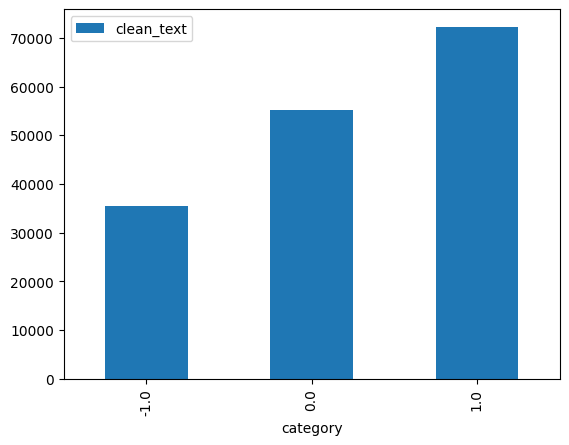

In [115]:
# The distribution of sentiments
df.groupby('category').count().plot(kind='bar')

In [116]:
# Map tweet categories
df['category'] = df['category'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})

# **Visualizing data into wordclouds**

In [117]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def wordcount_gen(df, category):
    '''
    Generating Word Cloud
    inputs:
       - df: tweets dataset
       - category: Positive/Negative/Neutral
    '''
    
    text = ' '.join(df['clean_text'].astype(str))  # Convert 'clean_text' to string
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords).generate(text)

    plt.figure(1)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(f'Word Cloud - {category} Sentiment')
    plt.show()



In [118]:
df

,clean_text,category
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive
...,...,...
162975,why these 456 crores paid neerav modi not reco...,Negative
162976,dear rss terrorist payal gawar what about modi...,Negative
162977,did you cover her interaction forum where she ...,Neutral
162978,there big project came into india modi dream p...,Neutral


Positive words in the Dataset


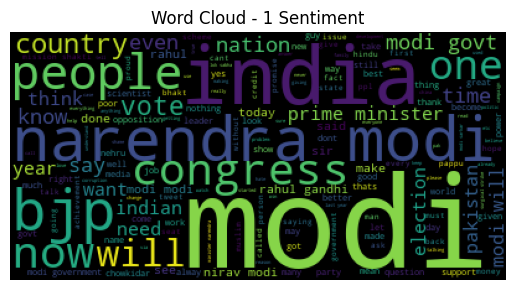

In [119]:
#Generate Positive tweet words cloud
print("Positive words in the Dataset")
wordcount_gen(df, 1)

#fill code

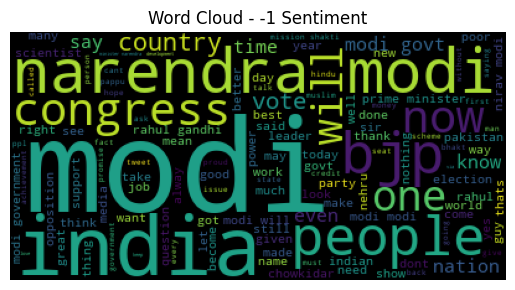

In [120]:
#Generate Negative tweet words cloud
wordcount_gen(df, -1)
#fill code

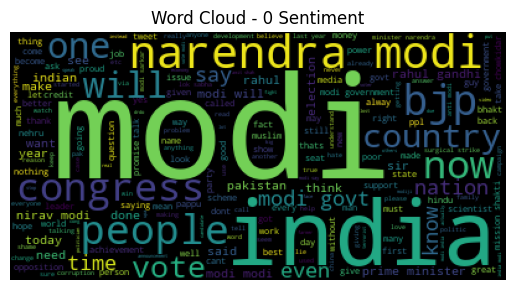

In [121]:
#Generate Neutral tweet words cloud
wordcount_gen(df, 0)
#fill code

# **Cleaning the tweets using RegEx and NLTK**

In [122]:
stopwords_list = set(stopwords.words("english"))   #stopwords downloading from NLTK in english

# We remove negation words in list of stopwords
no_stopwords = ["not","don't",'aren','don','ain',"aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
               'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't",
               "won't", 'wouldn', "wouldn't"]
for no_stopword in no_stopwords:
    stopwords_list.remove(no_stopword)

In [123]:
re_negation = re.compile("n't ")
# function that receive a sequence of woords and return the same sequence transforming
# abbreviated negations to the standard form.
def negation_abbreviated_to_standard(sent):
    sent = re_negation.sub(" not ", sent)
    return sent

In [124]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemma_stem_text(words_list):
    # Lemmatizer
    clean_text = [lemmatizer.lemmatize(token.lower()) for token in words_list]# eighties->eight or messages->message or drugs->drug
    clean_text = [lemmatizer.lemmatize(token.lower(), "v") for token in clean_text]# going-> go or started->start or watching->watch
    return clean_text

In [125]:
#fill code to return the cleaned tweet using RegEx and NLTK
def tweet_to_words(tweet):
#     ''' Convert tweet text into a sequence of words '''
#     #fill code
#     # Remove URLs
#     tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet)

#     # Remove special characters and numbers
#     tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)

#     # Convert to lowercase
#     tweet = tweet.lower()

#     # Tokenize tweet into words
#     words = word_tokenize(tweet)

#     # Remove stopwords
#     stop_words = set(stopwords.words('english'))
#     words = [word for word in words if word not in stop_words]

#     # Lemmatize words
#     lemmatizer = WordNetLemmatizer()
#     cleaned_tweet = [lemmatizer.lemmatize(word) for word in words]
    # 1. Transform abbreviated negations to the standard form.
    tweet = negation_abbreviated_to_standard(tweet)

    # 2. Remove non-letters and non-numbers
    letters_numbers_only = re.sub("[^a-zA-Z_0-9]", " ", tweet)   #keeping only numbers and letters

    # 3. Convert to lower case and split into individual words (tokenization)
    words = np.char.lower(letters_numbers_only.split())

    # 4. Remove stop words
    meaningful_words = [w for w in words if not w in stopwords_list]

    # 5. Apply lemmatization function
    lemma_words = lemma_stem_text(meaningful_words)

    # 6. Join the words back into one string separated by space, and return the result.
    cleaned_tweet =  " ".join(lemma_words)

    return cleaned_tweet


    #fill code

print("\nOriginal tweet ->", df['clean_text'][0])
print("\nProcessed tweet ->", tweet_to_words(df['clean_text'][0]))


Original tweet -> when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples

Processed tweet -> modi promise minimum government maximum governance expect begin difficult job reform state take year get justice state not business exit psus temple


In [126]:
# Apply data processing to each tweet
from sklearn.preprocessing import LabelEncoder

# Encode target labels using scikit learn
# Preprocess the tweets (example: lowercase conversion)
df['clean_text'] = df['clean_text'].str.lower()

# Step 2: Encode target labels using LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit_transform(df['category'])

#fill code




array([0, 1, 2, ..., 1, 1, 2])

In [127]:
df = df.dropna()
df.shape

(162969, 2)

In [128]:
#train test splitting using scikit learn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(df['clean_text'], df['category'], test_size=0.2, random_state=42)#fill code

#**Train Test Split for training the Regression model**

In [129]:
#Transform the training and testing data using countvectorizer
from sklearn.feature_extraction.text import CountVectorizer


#fill code



from sklearn.feature_extraction.text import CountVectorizer
import numpy as np


# Check for NaN values and handle them
X_train = X_train.fillna('')  # Replace NaN with empty strings

vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_transformed = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_transformed = vectorizer.transform(X_test)




#fill code





In [130]:
#train multivariate logistic regression on the data using scikit learn
from sklearn.linear_model import LogisticRegression


logreg_model = LogisticRegression()
logreg_model.fit(X_train_transformed, y_train)



#fill code







C:\Python31010\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [131]:
#predict using your model on the testing dataset

#fill code


y_pred = logreg_model.predict(X_test_transformed)



#fill code



In [132]:
y_pred

array(['Neutral', 'Positive', 'Negative', ..., 'Neutral', 'Positive',
       'Positive'], dtype=object)

# **Analysing the Results**

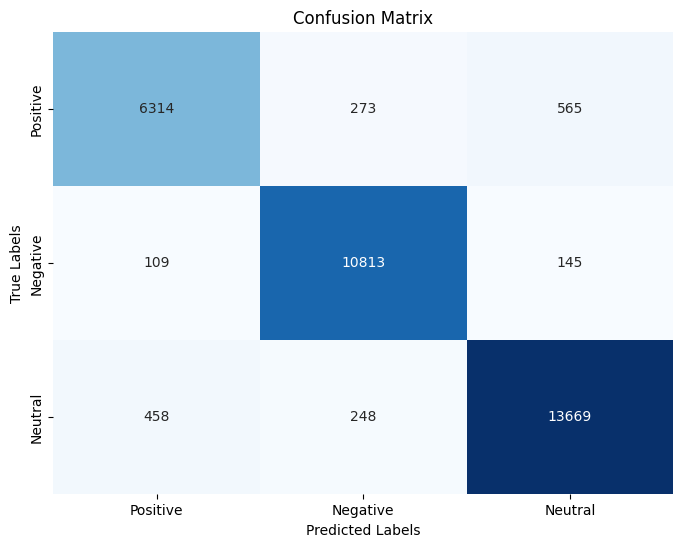

In [133]:
#Calculate and plot the Confusion matrix


#fill code
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



cm = confusion_matrix(y_test, y_pred)
# Define custom class labels for tick labels
class_labels = ['Positive', 'Negative', 'Neutral']


# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,  xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



#fill code



In [134]:
#calculate the precision , recall and accuracy using scikit learn

#fill code



from sklearn.metrics import precision_score, recall_score, accuracy_score

# Assuming 'y_test' contains the true target labels and 'y_pred' contains the predicted target labels.

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' takes into account class imbalances
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # 'weighted' takes into account class imbalances
print("Recall:", recall)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)





#fill code





Precision: 0.9445339729643897
Recall: 0.9448364729704853
Accuracy: 0.9448364729704853


Hope You Learnt the techniques for sentiment analysis , remember this is just the tip of the iceberg, there is alot to learn.. so keep learning... keep growing :) .